<a href="https://colab.research.google.com/github/BrandonBosire/WEEK-7-IP/blob/main/WEEK_7_IP_(BRANDON_BOSIRE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##HASS CONSULTANCY :REAL ESTATE EVALUATION MODELLING.


###DEFINING THE QUESTION
Study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months.

###METRIC FOR SUCCESS
Successfully create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

###CONTEXT
The dataset provided details the metrics used by the company and are collected for processing as assessments surrounding each property. We will be using this data to identify key features for the perfect model.

###EXPERIMENTAL DESIGN

Below is the structure that the project will follow:

- Data Cleaning and Preparation
    - Load libraries and dataset
    - Deal with missing values
    - Deal with outliers.
    - Deal with anomalies.
    - Deal with duplicated records
- Perform EDA
    - Univariate Analysis
    - Bivariate Analysis

-  Assess multicollinearity. 
-  Perform multivariate Analysis:
    - Multiple Linear Regression
    - Quantile Regression
    - Ridge Regression
    - Lasso Regression
    - Elastic Net Regression  
    - Residual plotting for all the above  
    - Assess heteroskedasity of all models.

###DATA RELEVANCE
Below are the variables found in the dataset to be analyzed as well as the definition of each:

**Id** 

**price**  - Price of the house

**bedrooms** - Number of Bedrooms

**bathrooms** - Number of Bathrooms

**sqft_living** - Square feet area of living area

**sqft_lot**  - Square feet area of parking Layout

**floors** - Number of Floors

**condtion** - Current state of the house.

**waterfront** - Whether waterfront is there or not

**view** - Number of Views

**grade** - Grade of house

**sqft_above**

**sqft_basement** - Square feet area off basement

**yr_built** - Year the house is built

**yr_renovated** - Year the house is renovated

**zipcode** - zipcode os the house

**lat** : Latitude of the house

**lon** : Longitude of the house

**sqft_living15**

**sqft_lot15**

####IMPORTING THE LIBRARIES:

In [412]:
#The libraries for visualizations and dataset manipulation.
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

####LOADING THE DATASET:

In [413]:
#We will now load the dataset 
#

hass_df= pd.read_csv('/content/Independent Project Week 7 - house_data.csv')

In [414]:
#Displaying the top 5 rows of the data
#

hass_df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [415]:
#Displaying the bottom 5 rows 
#

hass_df.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [416]:
#Checking the number of rows and columns to determine if they fit the variable numbers
#
hass_df.shape

#We can see that they are a match(the number of columns are equal)

(21613, 20)

In [417]:
#Checking for summary description of data
#

hass_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

In [418]:
#Checking for null values in the data
#
hass_df.isnull().sum()
#There are no null values.

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [419]:
#Checking for anomalies
#We will only check for these in the categorical columns(the 'grade' and 'condition' columns).
#
cat=hass_df[['grade','condition']]
for i in cat:
  print(cat[i].unique())
  print('\n')

#There is no anomalous value in the categorical data seeing that the data is numerical.

[ 7  6  8 11  9  5 10 12  4  3 13  1]


[3 5 4 1 2]




In [420]:
#Checking for duplicated rows
#

hass_df.duplicated().sum()

3

In [421]:
#Dropping duplicated rows
#
hass_df=hass_df.drop_duplicates()
hass_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


####Univariate analysis
We will now carry out bivariate analysis by:

 - Plotting distribution plots

 - Plotiing boxplots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

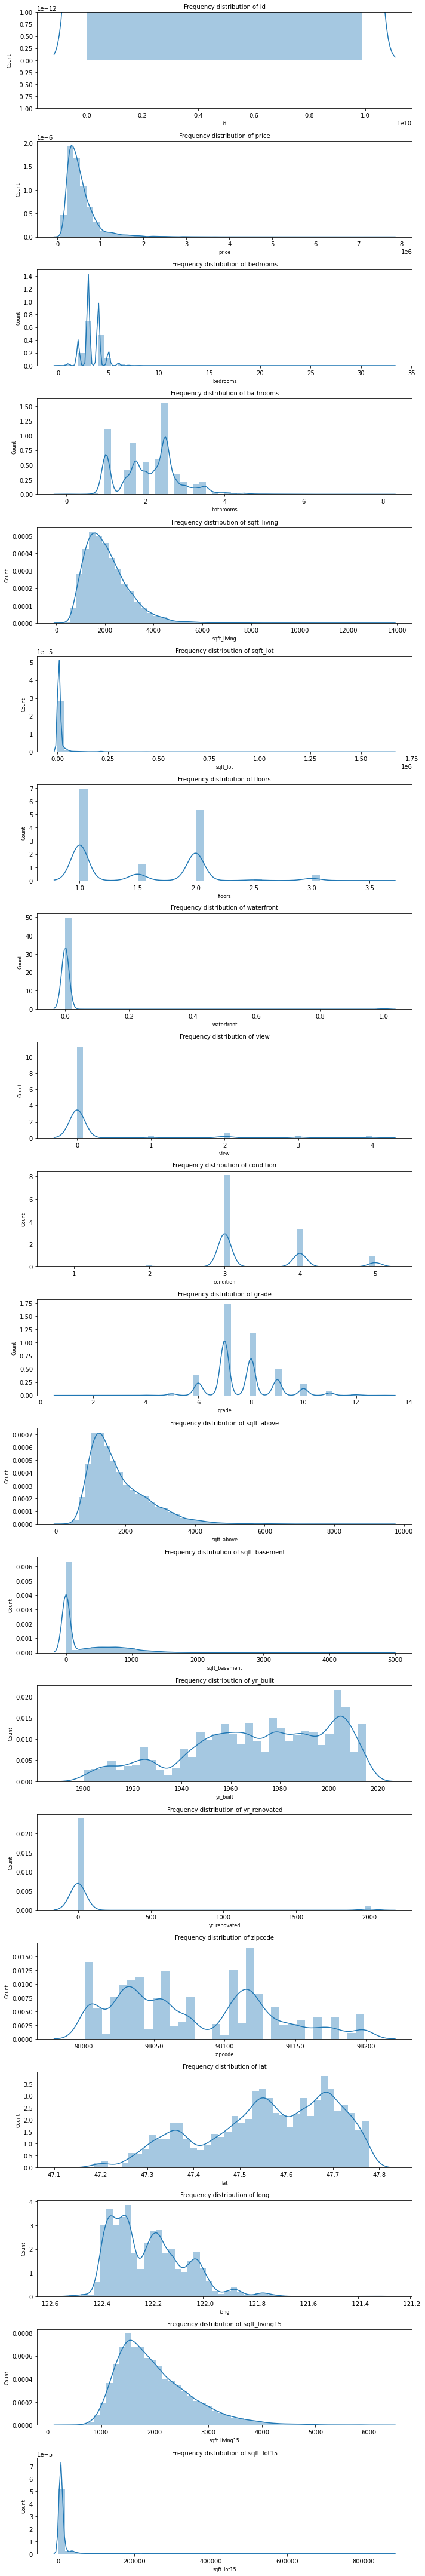

In [422]:
#Distribution plots of all columns
#
col=hass_df.columns
fig, ax = plt.subplots(len(col), figsize=(10,60))

for i, col in enumerate(col):

    sns.distplot(hass_df[col], hist=True, ax=ax[i])
    ax[i].set_title('Frequency distribution of '+col, fontsize=10)
    ax[i].set_xlabel(col, fontsize=8,)
    ax[i].set_ylabel('Count', fontsize=8)   
plt.tight_layout()
plt.show()

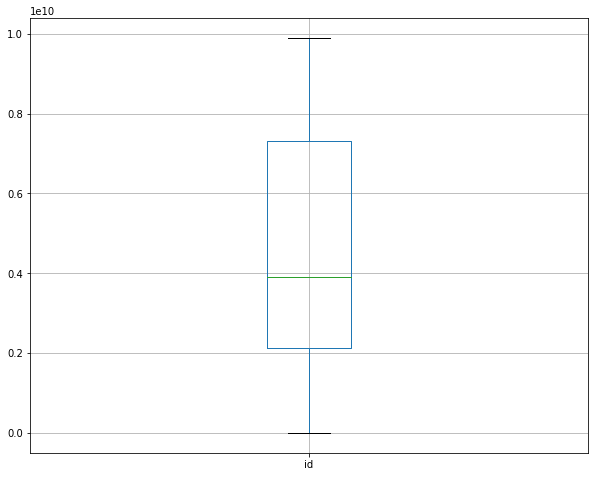

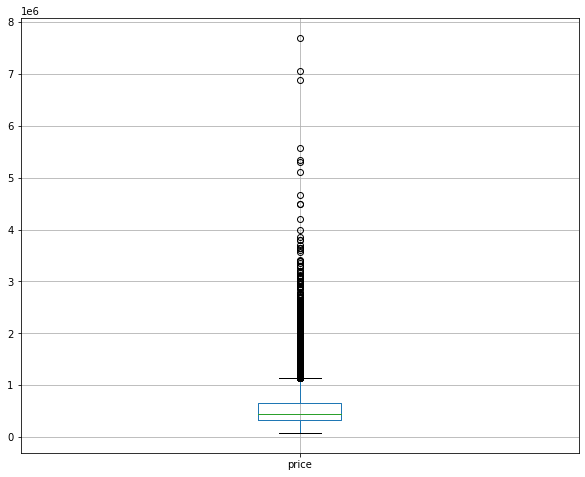

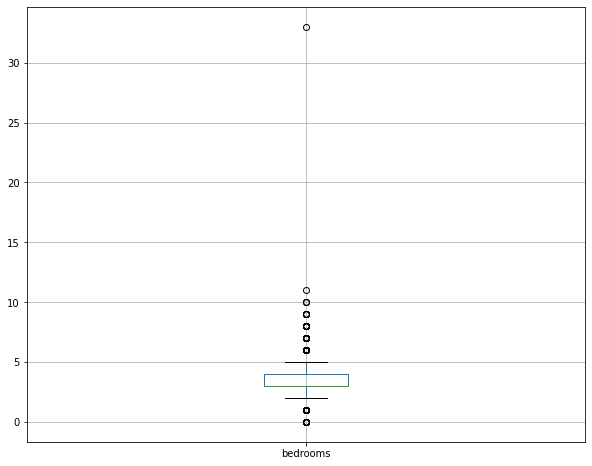

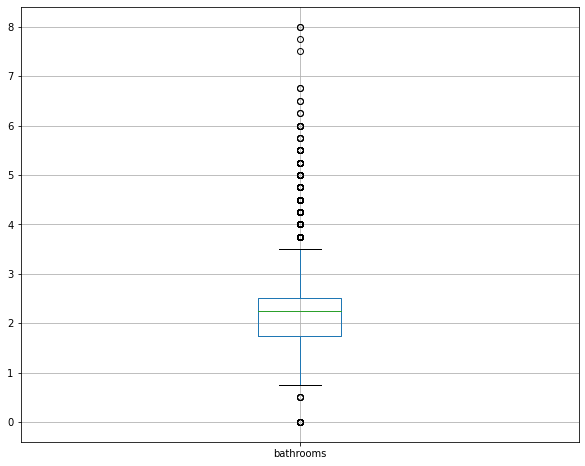

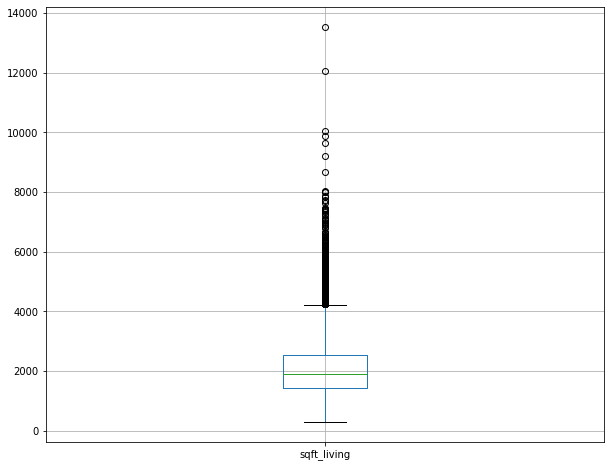

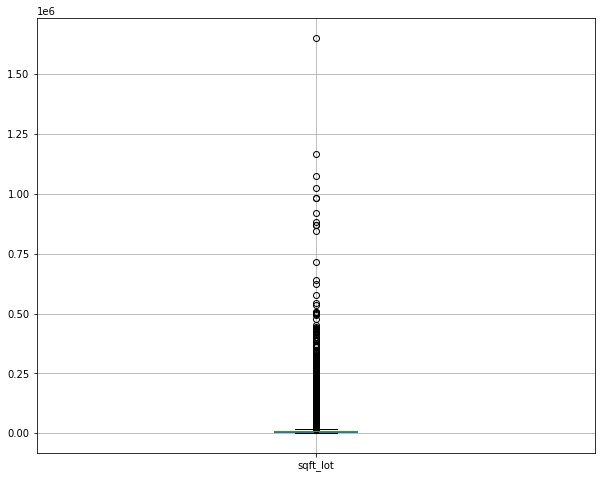

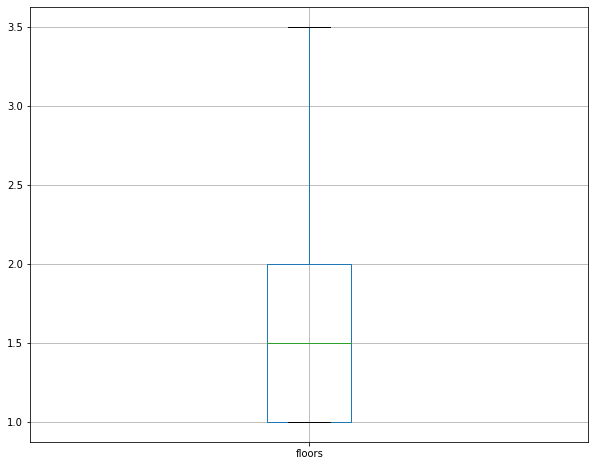

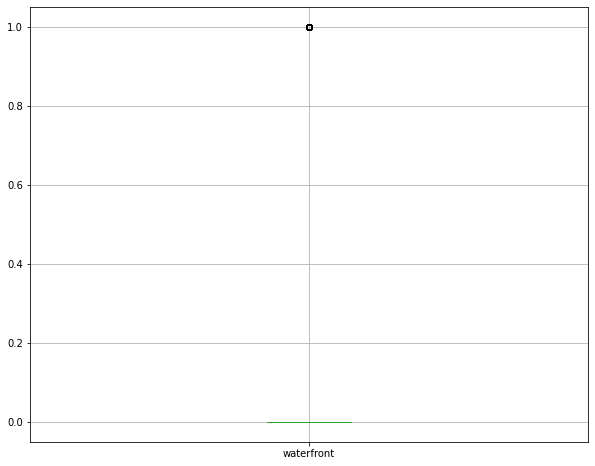

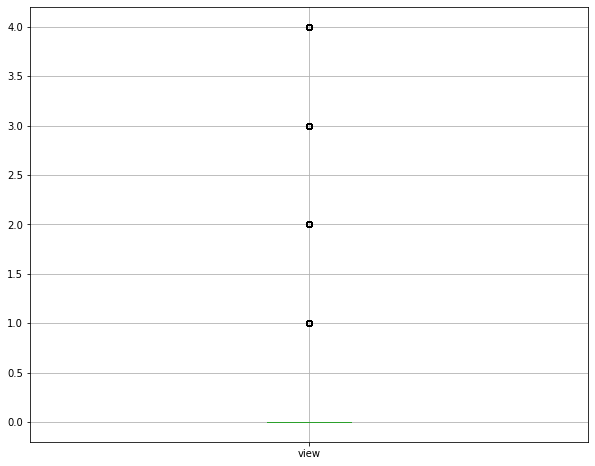

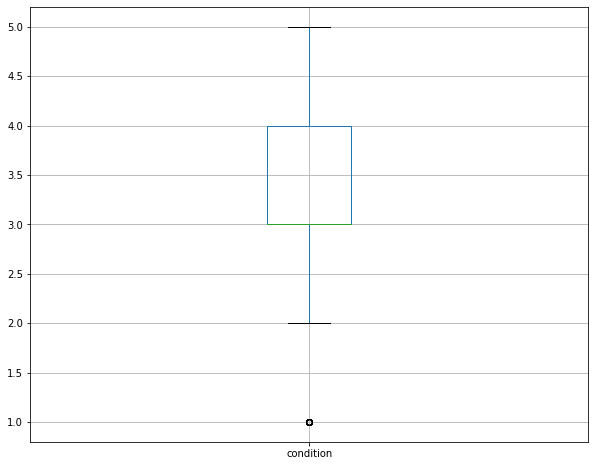

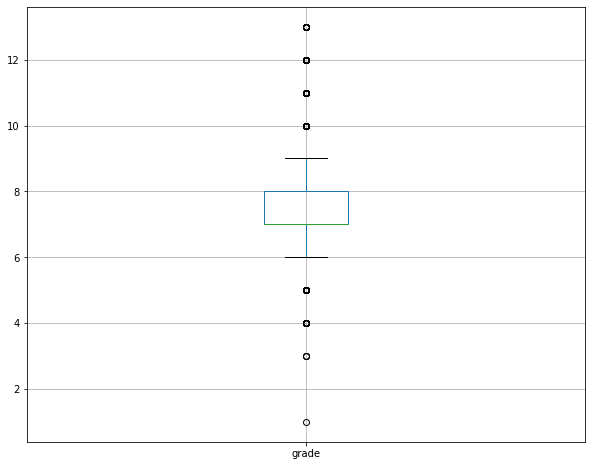

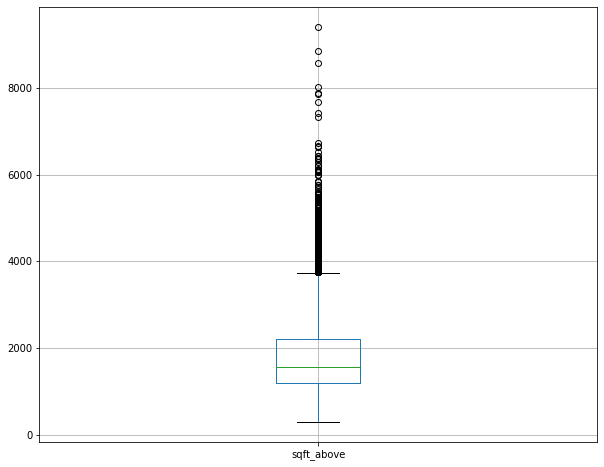

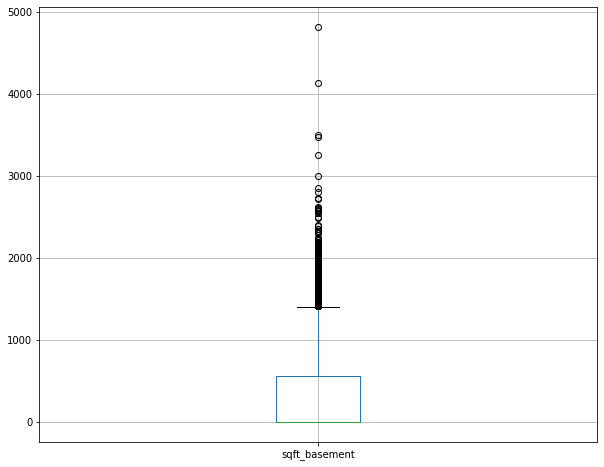

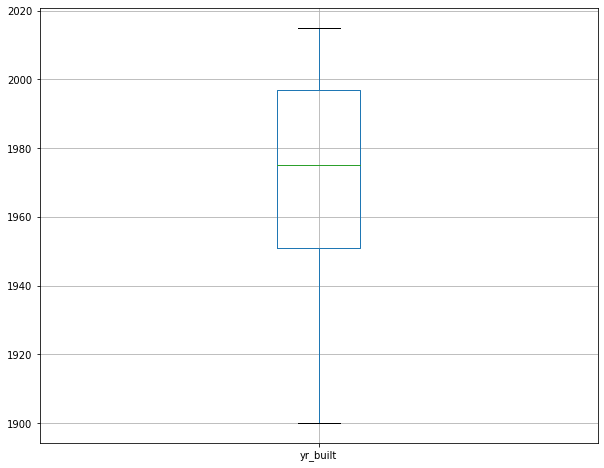

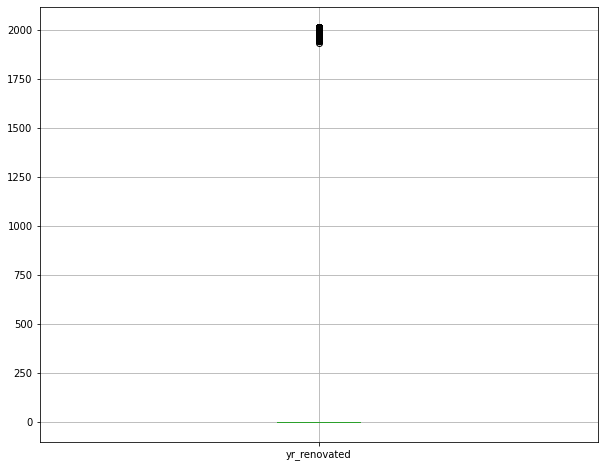

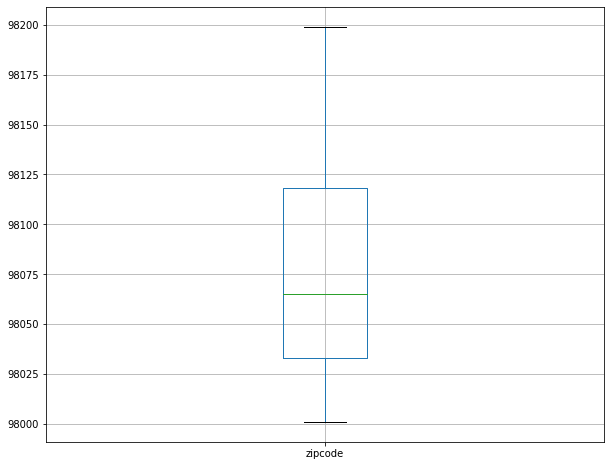

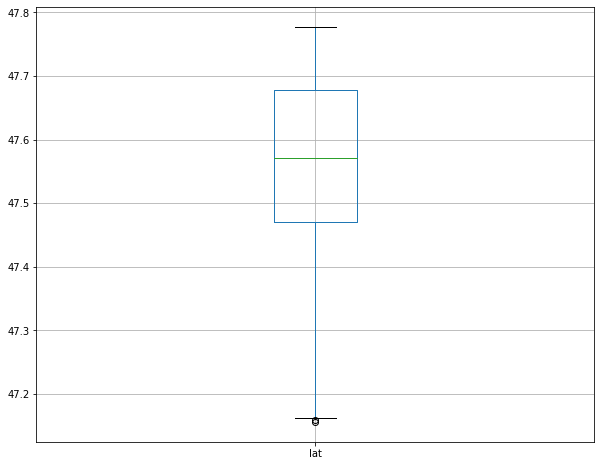

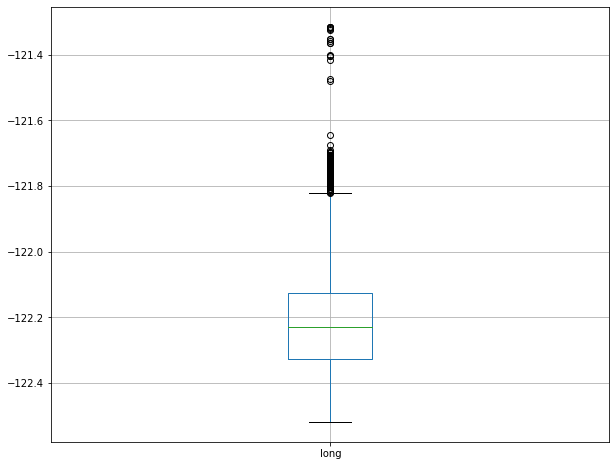

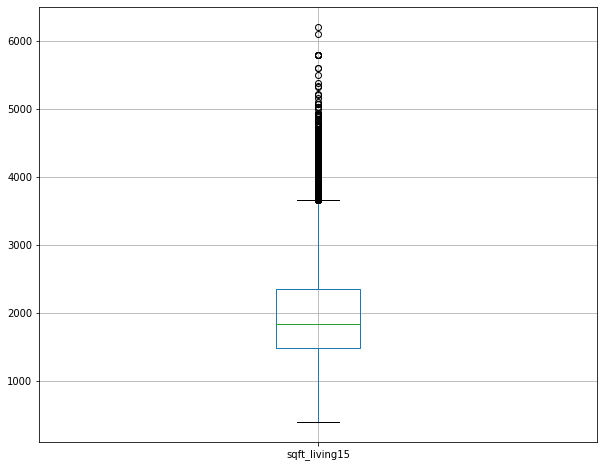

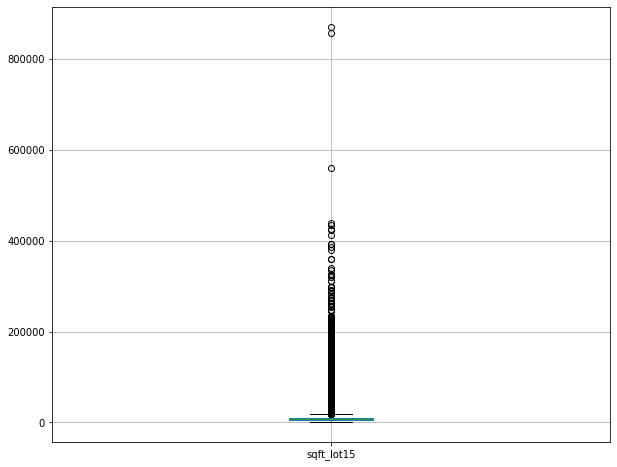

In [423]:
#Plotting boxplots of the dataset columns
col=hass_df.columns
for col in col:
  plt.figure(figsize = (10, 8))
  hass_df.boxplot([col])

###BIVARIATE ANALYSIS
We will carry out bivariate analysis through:

 - Correlation heatmapping.

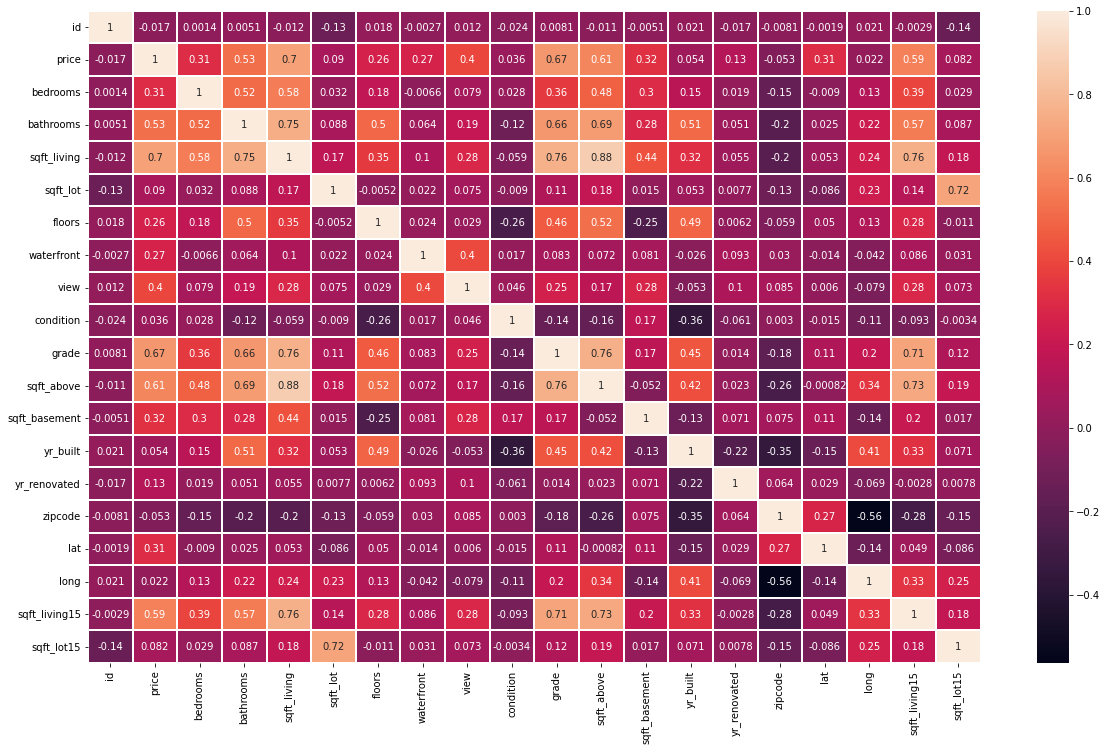

In [424]:
#Creating pearson correlation matrix for all columns
#
cor=hass_df.corr()

#Then creating heatmap
#
plt.figure(figsize=(20,12))
sns.heatmap(cor,linewidths='1',annot=True)

####ASSESSING VARIABLE MULTICOLLINEARITY:

This will done by calculating the Variable Inflation Factor for all independent variable columns.

These will then be used to determine the columns to include as independent variable, the threshold for this will be VIF score of 5 and above. Any values at this level orabove will not be included as independent variable.



In [425]:
#Calculating VIF score for the independent variables.
#These variables are all the columns except ID and price columns.
#
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

IndepVar=hass_df.drop(['id','price'],axis=1) 
vif_data = pd.DataFrame()
vif_data["feature"] = IndepVar.columns
vif_data["VIF"] = [variance_inflation_factor(IndepVar.values, i) for i in range(len(IndepVar.columns))]
vif_data
#There is no vif above 5 thererefore all columns can be used.
#

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,VIF
0,bedrooms,2.327159e+01
1,bathrooms,2.861269e+01
2,sqft_living,inf
3,sqft_lot,2.377668e+00
4,floors,1.689070e+01
5,waterfront,1.213032e+00
6,view,1.551921e+00
7,condition,3.471087e+01
8,grade,1.473633e+02
9,sqft_above,inf


###REGRESSION MODELING


In [426]:
#Importing the machine learning libraries
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import metrics
import statsmodels.formula.api as smf




###MULTIVARIATE ANALYSIS 

This is being done so that we can select the most important vairables.(Reduction technique)

These are those that determine the target variable the most.

We will use Linear Discriminat Analysis method.

In [427]:
#Our independent and dependent variables.
#
X=hass_df.drop(['id','lat','long','price'],axis=1)
y=hass_df['price']


In [428]:
#Principal Component Analysis creation
#

#Spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Standardization of data.
#
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test= sc.transform(X_test)
#Creation of instance of pca
#
pca=PCA()
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

#Displaying variance ratios
#
explained_variance = pca.explained_variance_ratio_
explained_variance 
#From this we can conclude that the first 10 components will be sufficent
#They account for 99% of the variance

array([3.17453654e-01, 1.24473405e-01, 1.07548760e-01, 8.21870961e-02,
       6.60320730e-02, 5.65692129e-02, 5.20835029e-02, 4.31044635e-02,
       3.71598673e-02, 3.20610403e-02, 2.08307442e-02, 1.72979902e-02,
       1.60124992e-02, 1.45404671e-02, 1.26452244e-02, 7.91592312e-33])

In [429]:
#Sum of the first 10 variance ratios
#
np.sum([4.25324808e-01, 3.05207195e-01, 1.24996363e-01, 7.12560318e-02,
       6.23202217e-02, 9.16062689e-03, 1.21069177e-03, 4.74487976e-04,
       3.54499883e-05, 7.86067789e-06])

0.99999373680219

####Multiple Linear Regression:

Multiple Linear Model R2 score : 0.6521387503729903
Multiple Linear Model Residuals: -3804.2559532935193
Multiple Linear Model Root mean square error : 222445.2079398786
Multiple Linear Model p-value 1.151122543190628e-100
The variables are homogeneous, keep model


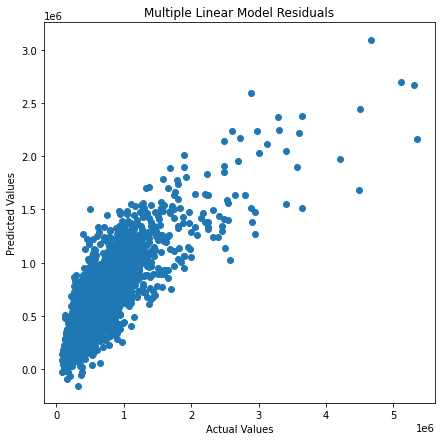

In [430]:
#The first model will be done through multilinear regression
#
#Independent and dependent variables
#
X=hass_df.drop(['id','lat','long','price'],axis=1)
y=hass_df['price']
# Standadizing our features
#
scaler = StandardScaler()
X= scaler.fit_transform(X)

#Creating instance of multiple linear regression
#Then training
#
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)
mlin_reg= LinearRegression()
mlin_reg.fit(X_train,y_train)

#Creation prediction variable
#

y_pred=mlin_reg.predict(X_test)
Multilinear_Accuracy=r2_score(y_test,y_pred)

#Model evaluation
print('Multiple Linear Model R2 score :', r2_score(y_test,y_pred))
residuals = np.subtract(y_pred, y_test)
#Residual Calculation:
pd.DataFrame(residuals).describe()
print('Multiple Linear Model Residuals:' ,residuals.mean())
print("Multiple Linear Model Root mean square error :",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))
# Heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Multiple Linear Model p-value',p_value)

if (test_result > critical_value):
  print('Dismiss Model')
else:
  print('The variables are homogeneous, keep model')
#Accuracy of model.


#Residual plots
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Multiple Linear Model Residuals');

#RIDGE REGRESSION MODELING

What follows is a ridge regression approach to try and identify the change in our accuracy metric (R2 score)  which will be kept and used to conclude on the best model of the four.

In [431]:
#The next model will be a ridge regression model.
#
#Independent and dependent variables
#
X=hass_df.drop(['id','lat','long','price'],axis=1)
y=hass_df['price']
# Standadizing our features
#
scaler = StandardScaler()
X= scaler.fit_transform(X)

#Splitting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)

# Standadizing our features
#
scaler = StandardScaler()
X= scaler.fit_transform(X)

# Creating lasso object
# 
ridge = Ridge(normalize=True) 

# Fitting the models
# 
ridge.fit(X, y) 
y_pred=ridge.predict(X_test)
# Print scores, MSE, and coefficients
# 
print("Ridge Model  R2-score:",r2_score(y_test,y_pred)) 
print("Ridge Model MSE:", mean_squared_error(y, ridge.predict(X))) 

Ridge Model  R2-score: 0.581657112906793
Ridge Model MSE: 56052576961.34316


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


In [432]:
#Hyperparameter tuning using Gridsearch 
#
params={
   'alpha':[0.001,1000,0.1], 'max_iter':[1,10000,1] ,'tol':[0,100,0.0001]
       }
ridge_reg=GridSearchCV(ridge,params,cv=5,scoring='r2',n_jobs=-1)
ridge_reg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


GridSearchCV(cv=5, estimator=Ridge(normalize=True), n_jobs=-1,
             param_grid={'alpha': [0.001, 1000, 0.1], 'max_iter': [1, 10000, 1],
                         'tol': [0, 100, 0.0001]},
             scoring='r2')

In [433]:
#Getting best parameters
#Together with best score
#
print('Best Parameter',ridge_reg.best_params_)
print('Best Score',ridge_reg.best_score_)


Best Parameter {'alpha': 0.001, 'max_iter': 1, 'tol': 0}
Best Score 0.6468166055238578


In [434]:
#Refined and parameter tuned Ridge Model Scores
#
ridge_reg.fit(X_test,y_test)
tuned_y_pred=ridge_reg.predict(X_test)
print('Tuned Ridge Model R2 Score:',r2_score(y_test,y_pred=tuned_y_pred))
Ridge_Accuracy=r2_score(y_test,y_pred=tuned_y_pred)

Tuned Ridge Model R2 Score: 0.6569482758331086


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,


Ridge Model Residuals: -2798.738157830616
Ridge Model Root mean square error : 243941.79916650287
ElasticNet Model p-value: 7.713248168209635e-11
The variables are homogeneous, keep model


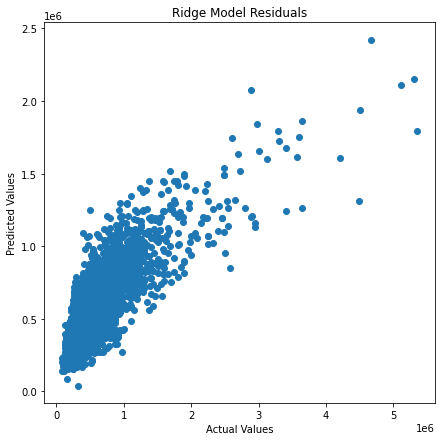

In [435]:
#Creating residuals for heteroskedasticity testing
#
residuals = np.subtract(y_pred, y_test)
#Residual Calculation:
pd.DataFrame(residuals).describe()
print('Ridge Model Residuals:' ,residuals.mean())
print("Ridge Model Root mean square error :",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

# Heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('ElasticNet Model p-value:',p_value)

if (test_result > critical_value):
  print('Dismiss Model')
else:
  print('The variables are homogeneous, keep model')

#Residual plots
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Model Residuals');

#Lasso Regression Model

What follows is a lasso regression approach to try and identify the change in our accuracy metric (R2 score)  which will be kept and used to conclude on the best model of the four.


In [436]:
#We will now create a lasso regression model
#
#Independent and dependent variables
#
X=hass_df.drop(['id','lat','long','price'],axis=1)
y=hass_df['price']
# Standadizing our features
#
scaler = StandardScaler()
X= scaler.fit_transform(X)

#Splitting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)


# Creating lasso object
# 
lasso = linear_model.Lasso() 

# Fitting the models
# 
lasso.fit(X, y) 
y_pred=lasso.predict(X_test)
# Print scores, MSE, and coefficients
# 
print("Lasso Model score:",r2_score(y_test,y_pred)) 
print("Lasso Model MSE:", mean_squared_error(y, lasso.predict(X))) 

Lasso Model score: 0.654340399598209
Lasso Model MSE: 46722316846.151924


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.165e+13, tolerance: 2.917e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [437]:
#Hyperparameter tuning using Gridsearch 
#
params={
   'alpha':[0.001,1000,0.1], 'max_iter':[1,10000,1] ,'tol':[0,100,0.0001]
       }
lasso_reg=GridSearchCV(lasso,params,cv=5,scoring='r2',n_jobs=-1)
lasso_reg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.125e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.001, 1000, 0.1], 'max_iter': [1, 10000, 1],
                         'tol': [0, 100, 0.0001]},
             scoring='r2')

In [438]:
#Getting best parameters
#Together with best score
#
print('Best Parameter',lasso_reg.best_params_)
print('Best Score',lasso_reg.best_score_)

Best Parameter {'alpha': 1000, 'max_iter': 10000, 'tol': 0}
Best Score 0.6469234498772992


In [439]:
#Refined and parameter tuned lasso object tests
#
lasso_reg.fit(X_test,y_test)
tuned_y_pred=lasso_reg.predict(X_test)
print('Tuned Lasso Model Score:',r2_score(y_test,y_pred=tuned_y_pred))
Lasso_Accuracy=r2_score(y_test,y_pred=tuned_y_pred)

Tuned Lasso Model Score: 0.6567899129642236


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.406e+00, tolerance: 0.000e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso Model Residuals: -2812.8491131148016
Lasso Model Root mean square error : 221740.15140397087
Lasso Model p-value: 1.0645505598277404e-107
The variables are homogeneous, keep model


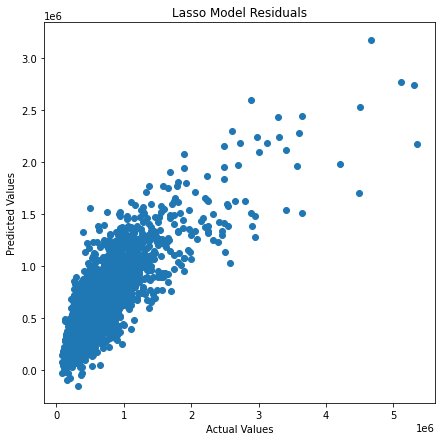

In [440]:
#Creating residuals for heteroskedasticity testing
#
residuals = np.subtract(y_pred, y_test)
#Residual Calculation:
pd.DataFrame(residuals).describe()
print('Lasso Model Residuals:' ,residuals.mean())
print("Lasso Model Root mean square error :",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

# Heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('Lasso Model p-value:',p_value)

if (test_result > critical_value):
  print('Dismiss Model')
else:
  print('The variables are homogeneous, keep model')

#Residual plots
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Lasso Model Residuals');

#ELASTIC NET REGRESSION MODELING

What follows is the last regression approach (ElasticNet) to try and identify the change in our accuracy metric (R2 score)  which will be kept and used to conclude on the best model of the four.

In [441]:
#We will now create a ElasticNet regression model
#
#Independent and dependent variables
#
X=hass_df.drop(['id','lat','long','price'],axis=1)
y=hass_df['price']
# Standadizing our features
#
scaler = StandardScaler()
X= scaler.fit_transform(X)

#Splitting into train and test
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=4)

# Creating ElasticNet object
# 
elastic=ElasticNet(normalize=False)

# Fitting the models
# 
elastic.fit(X, y) 
y_pred=elastic.predict(X_test)
# Print scores, MSE, and coefficients
# 
print("ElasticNet Model score:",r2_score(y_test,y_pred)) 
print("ElasticNet Model MSE:", mean_squared_error(y, elastic.predict(X))) 

ElasticNet Model score: 0.618137686921685
ElasticNet Model MSE: 51285909053.96091


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


In [442]:
#Hyperparameter tuning using Gridsearch 
#
params={
   'alpha':[0.0001,1000,0.1],'l1_ratio':[0.001,1,0.000001] 
       }
elastic_reg=GridSearchCV(elastic,params,cv=10,scoring='r2',n_jobs=-1,refit=True)
elastic_reg.fit(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


GridSearchCV(cv=10, estimator=ElasticNet(normalize=False), n_jobs=-1,
             param_grid={'alpha': [0.0001, 1000, 0.1],
                         'l1_ratio': [0.001, 1, 1e-06]},
             scoring='r2')

In [443]:
#Getting best parameters
#Together with best score
#
print('Best Parameter',elastic_reg.best_params_)
print('Best Score',elastic_reg.best_score_)

Best Parameter {'alpha': 1000, 'l1_ratio': 1}
Best Score 0.6475106302978804


In [444]:
#Refined and parameter tuned Ridge Model Scores
#
elastic_reg.fit(X_test,y_test)
tuned_y_pred=elastic_reg.predict(X_test)
print('Tuned Elastic Model R2 Score:',r2_score(y_test,y_pred=tuned_y_pred))
print("Tuned Elastic Model MSE:", mean_squared_error(y, ridge_reg.predict(X)))
Elastic_Accuracy=r2_score(y_test,y_pred=tuned_y_pred) 

Tuned Elastic Model R2 Score: 0.6567899414912567
Tuned Elastic Model MSE: 47080711619.233284


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,


ElasticNet Model Residuals: -2830.1457317402756
Elastic Model Root mean square error : 233063.05097755318
ElasticNet Model p-value: 5.068140226932393e-08
The variables are homogeneous, keep model


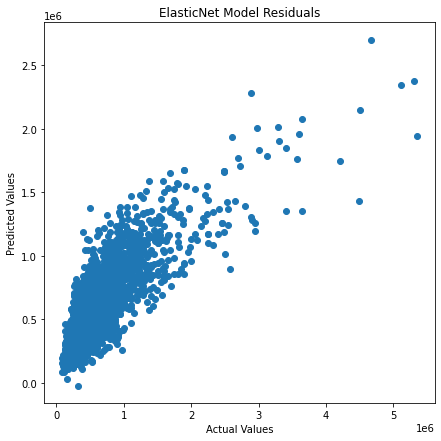

In [445]:
#Creating residuals for heteroskedasticity testing
#
residuals = np.subtract(y_pred, y_test)
#Residual Calculation:
pd.DataFrame(residuals).describe()
print('ElasticNet Model Residuals:' ,residuals.mean())
print("Elastic Model Root mean square error :",np.sqrt(metrics.mean_squared_error(y_pred,y_test)))

# Heteroskedasticity
import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

degree_of_freedom = len(y_pred)-1
probability = 1 - p_value
critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print('ElasticNet Model p-value:',p_value)

if (test_result > critical_value):
  print('Dismiss Model')
else:
  print('The variables are homogeneous, keep model')

#Residual plots
plt.figure(figsize=(7,7))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('ElasticNet Model Residuals');

##CONCLUSION:
From the above model metrics ,we can conclude that the most appropriate model for this context is:
  
  - Ridge Regression Model : It had the highest R2 accuracy score of 65.69

In [446]:
#Accuracy scores of each of the regression models.
print('Ridge:',Ridge_Accuracy)
print('Multi:',Multilinear_Accuracy)
print('Lasso:',Lasso_Accuracy)
print('Elastic:',Elastic_Accuracy)

Ridge: 0.6569482758331086
Multi: 0.6521387503729903
Lasso: 0.6567899129642236
Elastic: 0.6567899414912567
